In [30]:

from lxml import html
import json
from datetime import datetime
import re

from pprint import pprint as p


In [2]:
with open('driver.json', 'r') as myfile:
    data=myfile.read()
    
obj = json.loads(data)
pages_html = obj[0]['Response']
pages_html
# pprint.pprint(obj[0])
# len(obj[0])

'<!DOCTYPE html>\n\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en-US">\n\t\n    <!-- HEAD BEGINS -->\n    <head>\n    \t\n        <!-- CHARSET -->\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n        <meta name="viewport" content="width=device-width, user-scalable=no" />\n        <!-- Browser top bar colour change - Android Feb 2017 -->\n\t\t<meta name="theme-color" content="#0590d0">\n\t\t\n            \t\n        <!-- PAGE TITLE -->\n    \t<title>Showroom | SA Cars For Sale | Drive It</title>\n        \n\t\t<link rel="pingback" href="https://www.driveit.co.za/xmlrpc.php" />\n        \n        <!-- WP_HEAD STARTS -->\n        <script>(function(d, s, id){\n\t\t\t\t var js, fjs = d.getElementsByTagName(s)[0];\n\t\t\t\t if (d.getElementById(id)) {return;}\n\t\t\t\t js = d.createElement(s); js.id = id;\n\t\t\t\t js.src = "//connect.facebook.net/en_US/sdk.js#xfbml=1&version=v2.6";\n\t\t\t\t fjs.parentNode.insertBefore(js, fjs);\n\t\t\t   }(document, \'s

In [4]:
import pprint
pprint.pprint(pages_html)

('<!DOCTYPE html>\n'
 '\n'
 '<html xmlns="http://www.w3.org/1999/xhtml" lang="en-US">\n'
 '\t\n'
 '    <!-- HEAD BEGINS -->\n'
 '    <head>\n'
 '    \t\n'
 '        <!-- CHARSET -->\n'
 '\t\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n'
 '        <meta name="viewport" content="width=device-width, user-scalable=no" '
 '/>\n'
 '        <!-- Browser top bar colour change - Android Feb 2017 -->\n'
 '\t\t<meta name="theme-color" content="#0590d0">\n'
 '\t\t\n'
 '            \t\n'
 '        <!-- PAGE TITLE -->\n'
 '    \t<title>Showroom | SA Cars For Sale | Drive It</title>\n'
 '        \n'
 '\t\t<link rel="pingback" href="https://www.driveit.co.za/xmlrpc.php" />\n'
 '        \n'
 '        <!-- WP_HEAD STARTS -->\n'
 '        <script>(function(d, s, id){\n'
 '\t\t\t\t var js, fjs = d.getElementsByTagName(s)[0];\n'
 '\t\t\t\t if (d.getElementById(id)) {return;}\n'
 '\t\t\t\t js = d.createElement(s); js.id = id;\n'
 '\t\t\t\t js.src = '
 '"//connect.facebook.net/en_U

 'class="icon-th"></i> Grid</a></li>\n'
 '                \n'
 '                \t<li class="border-color-input"><a '
 'href="/cars-for-sale/?per_page=15&view=list" class="type-color"><i '
 'class="icon-th-list"></i> List</a></li>\n'
 '                \n'
 '                </ul>\n'
 '                <!-- .listing-view -->\n'
 '\t\t\t\t\n'
 '\t\t\t\t            \n'
 '            </div>\n'
 '            <!-- .left -->\n'
 '                    \n'
 '\t\t\t\n'
 '                <div class="right type-color" id="listing-count">\n'
 '                \n'
 '                    <form id="listing-count-form" '
 'action="https://www.driveit.co.za" method="get">\n'
 '                    \n'
 '                        <label class="type-color">Per Page:</label>\n'
 '                        \n'
 '                        <select name="listing-count">\n'
 '                        \n'
 '                        \t                        \n'
 '                            \t<option '
 'value="/cars-for-sal

In [9]:
print(('<li class="spot-item border-color-input last even" id="spot-4315523">\n'
 '\t\n'
 '\t\n'
 '    <div class="spot-image one-third">\n'
 '\t\n'
 '\t\t<a '
 'href="https://www.driveit.co.za/used-cars/2017-audi-a3-3-door-2-0t-fsi-ambition/" '
 'title="2017 Audi A3 3-door 2.0T FSI Ambition" class="spot-image"><img '
 'src="https://www.driveit.co.za/img_assets/ix_imports/4315523DriveIt_Holder-500x350.jpg" '
 'alt="2017 Audi A3 3-door 2.0T FSI Ambition" title="2017 Audi A3 3-door 2.0T '
 'FSI Ambition" /></a>    \n'
 '    </div>\n'
 '    <!-- .spot-image -->\n'
 '\t\n'
 '\t\t\n'
 '\t\n'
 '    \n'
 '    <div class="spot-content-top two-thirds last">\n'
 '    \n'
 '    \t        <span class="spot-cats secondary-color"><a '
 'href="https://www.driveit.co.za/cars-for-sale-by/dealer/" '
 'rel="tag">DEALER</a></span>\n'
 '        \t\t\n'
 '        \t\t\n'
 '\t\t\t<div class="clear"></div>\n'
 '\t\t\t<!-- .clear -->\n'
 '\t\t\n'
 '        <h2><a '
 'href="https://www.driveit.co.za/used-cars/2017-audi-a3-3-door-2-0t-fsi-ambition/" '
 'title="2017 Audi A3 3-door 2.0T FSI Ambition">2017 Audi A3 3-door 2.0T FSI '
 'Ambition</a></h2>\n'
 '        \n'
 '        <a '
 'href="https://www.driveit.co.za/used-cars/2017-audi-a3-3-door-2-0t-fsi-ambition/" '
 'title="2017 Audi A3 3-door 2.0T FSI Ambition" class="read-more '
 'grid-only">View Car</a>\n'
 '        \n'
 '                \n'
 '    </div>\n'
 '    <!-- .spot-content-top -->\n'
 '        \n'
 '        \n'
 '        \n'
 '        <div class="spot-search-fields-wrapper one-sixth last">\n'
 '        \n'
 '            \n'
 '\t<ul class="spot-search-fields">\n'
 '    \n'
 '    \t<li id="sf_search_field_7"><span '
 'class="big">R389,900</span></li><li><span>Make</span>: '
 'AUDI</li><li><span>Model</span>: A3</li><li><span>Region</span>: '
 'GAUTENG</li><li id="sf_search_field_498"><span>Odo: </span>49585 Km</li><li '
 'id="sf_search_field_11"><span>Year</span>: 2017</li><li '
 'id="sf_search_field_500"><span>Fuel</span>: DIESEL</li><li '
 'id="sf_search_field_499"><span>Gearbox</span>: MANUAL</li><li '
 'id="sf_search_field_34"><span>Colour</span>: Other</li>    \n'
 '    </ul>\n'
 '    <!-- .spot-search-fields -->\n'
 '\n'
 '        \n'
 '        </div>\n'
 '    \n'
 '        \n'
 '        \n'
 '    <div class="spot-content one-half">\n'
 '    \n'
 '        <p>The car you saw today, and want to think about tonight, will be '
 'sold later today to the people who saw it yesterday and thought about it '
 'last night  Presenting the Audi A3 3-door 2.0T FSI Ambition . I '
 '[...]</p>        \n'
 '        <a '
 'href="https://www.driveit.co.za/used-cars/2017-audi-a3-3-door-2-0t-fsi-ambition/" '
 'title="2017 Audi A3 3-door 2.0T FSI Ambition" class="read-more">View '
 'Car</a>\n'
 '        \n'
 '            \n'
 '    </div>\n'
 '    <!-- .spot-content -->\n'
 '    \n'
 '    <div class="clear"></div>\n'
 '    <!-- .clear -->\n'
 '\n'
 '</li>\n'
 '<!-- .spot-item -->\n'
 '\n'
 '\t<li class="clear border-color-input"></li>\n'
 '                            \n'
 '                                                        \n'
 '                            \t                            \n').strip())

<li class="spot-item border-color-input last even" id="spot-4315523">
	
	
    <div class="spot-image one-third">
	
		<a href="https://www.driveit.co.za/used-cars/2017-audi-a3-3-door-2-0t-fsi-ambition/" title="2017 Audi A3 3-door 2.0T FSI Ambition" class="spot-image"><img src="https://www.driveit.co.za/img_assets/ix_imports/4315523DriveIt_Holder-500x350.jpg" alt="2017 Audi A3 3-door 2.0T FSI Ambition" title="2017 Audi A3 3-door 2.0T FSI Ambition" /></a>    
    </div>
    <!-- .spot-image -->
	
		
	
    
    <div class="spot-content-top two-thirds last">
    
    	        <span class="spot-cats secondary-color"><a href="https://www.driveit.co.za/cars-for-sale-by/dealer/" rel="tag">DEALER</a></span>
        		
        		
			<div class="clear"></div>
			<!-- .clear -->
		
        <h2><a href="https://www.driveit.co.za/used-cars/2017-audi-a3-3-door-2-0t-fsi-ambition/" title="2017 Audi A3 3-door 2.0T FSI Ambition">2017 Audi A3 3-door 2.0T FSI Ambition</a></h2>
        
        <a href="http

In [10]:
tree = html.fromstring(pages_html)

In [99]:
ID = tree.xpath('//li[contains(@class,"spot-item border-color-input")]/@id')
title = tree.xpath('//li[contains(@class,"spot-item border-color-input")]//a[@class="spot-image"]/@title')
url = tree.xpath('//li[contains(@class,"spot-item border-color-input")]//a[@class="spot-image"]/@href')

def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
def remove_junk(val):
    if ':' in val:
        return val[1:].strip()
    else:
        return val
info = tree.xpath('//li[contains(@class,"spot-item border-color-input")]//ul[@class="spot-search-fields"]//li/text()')
info = list(map(remove_junk,info))
info = list(divide_chunks(info,8))
make,model,location,mileage,year,fuel,transmission,color = map(list, zip(*info)) 
price = tree.xpath('//li[contains(@class,"spot-item border-color-input")]//ul[@class="spot-search-fields"]//li/span[@class="big"]/text()')

def sort_eng_size(val):
    return val[0] if val else 'N/A'
body_types = ['Hatch' , 'sedan' ,'coupe' ,'double cab' ]


capacity = [re.findall("\d+\.\d+|\d+\.\d+\D+", phrase) for phrase in title]
capacity = list(map(sort_eng_size,capacity ))
body_types = ['Hatch' , 'sedan' ,'coupe' ,'double cab' ]
def get_body(val):
    b_t = [body for body in body_types if body in val]
    return b_t[0] if b_t else 'N/A'

body = list(map(get_body,title))

def get_deriv(val):
    return " ".join( val.split()[3:]  )

deriviative = list(map(get_deriv,title ))





In [102]:

driveit = {index : { 'year':y , 'make':mk , 'model': m , 'deriviative':d,'mileage':ml  , 'price': p ,'engine': c , 'fuel':f , 'body':b,'transmision':trans , 'url':u ,'location':loc,'date':datetime.strftime(datetime.today(),'%Y-%m-%d') , 'title':t } 
           for index,y,mk,m,d,ml,p,c,f,b,trans,u,loc,t in zip(ID,year,make,model,deriviative,mileage,price,capacity,fuel,body,transmission,url,location,title) }

In [103]:
p(driveit)

{'spot-4315443': {'body': 'N/A',
                  'date': '2020-01-09',
                  'deriviative': '1.4 TSI Comfortline DSG',
                  'engine': '1.4',
                  'fuel': 'PETROL',
                  'location': 'GAUTENG',
                  'make': 'VOLKSWAGEN',
                  'mileage': '9200 Km',
                  'model': 'GOLF',
                  'price': 'R329,950',
                  'title': '2018 Volkswagen Golf 1.4 TSI Comfortline DSG',
                  'transmision': 'AUTO',
                  'url': 'https://www.driveit.co.za/used-cars/2018-volkswagen-golf-1-4-tsi-comfortline-dsg/',
                  'year': '2018'},
 'spot-4315445': {'body': 'N/A',
                  'date': '2020-01-09',
                  'deriviative': '3.0D-4D 4×4 auto',
                  'engine': '3.0',
                  'fuel': 'DIESEL',
                  'location': 'GAUTENG',
                  'make': 'TOYOTA',
                  'mileage': '108000 Km',
                  'model

In [106]:
url = 'https://www.driveit.co.za/cars-for-sale/?per_page=15'
new = url.replace('/?', '/page/2/?')
page_number = 3
new.replace( 'page/{}/'.format( page_number-1), 'page/{}/'.format( page_number))


'https://www.driveit.co.za/cars-for-sale/page/3/?per_page=15'

In [107]:
val = True
while 1:
    if val: break

In [113]:
class test:
    glob_var = 10
    def __init__(self,ini_var):
        self.inivar = ini_var
    def printer(self):
        print(self.glob_var)
t = test(10)

In [114]:
t.printer()

10


In [115]:
with open('driver.json', 'r') as myfile:
    data=myfile.read()
    
obj = json.loads(data)
# pages_html = obj[0]['Response']
# pages_html
pprint.pprint(obj[0])
len(obj)

{'spot-4307297': {'body': 'N/A',
                  'date': '2020-01-10',
                  'deriviative': 'Cruiser 79 4.0 V6',
                  'engine': '4.0',
                  'fuel': 'PETROL',
                  'location': 'GAUTENG',
                  'make': 'TOYOTA',
                  'mileage': '180981 Km',
                  'model': 'LAND CRUISER',
                  'price': 'R339,900',
                  'title': '2014 Toyota Land Cruiser 79 4.0 V6',
                  'transmision': 'MANUAL',
                  'url': 'https://www.driveit.co.za/used-cars/2014-toyota-land-cruiser-79-4-0-v6-2/',
                  'year': '2014'},
 'spot-4307331': {'body': 'N/A',
                  'date': '2020-01-10',
                  'deriviative': '1.4 TSI Comfortline DSG',
                  'engine': '1.4',
                  'fuel': 'PETROL',
                  'location': 'GAUTENG',
                  'make': 'VOLKSWAGEN',
                  'mileage': '10000 Km',
                  'model': 'JE

15

In [116]:
len(obj)

89

In [117]:
from collections import ChainMap
car_info = dict(ChainMap(*obj))

In [118]:
import pandas as pd
car_df = pd.DataFrame.from_dict(car_info, orient='index').reset_index()

In [122]:
car_df.loc[car_df.make == 'AUDI'].model.value_counts()

A4       60
A3       43
A5        9
Q5        8
Q3        7
OTHER     5
Q7        5
Q2        3
R8        3
A1        2
A7        2
A6        2
TT        2
Name: model, dtype: int64

In [129]:
car_df.body.value_counts()/len(car_df)

N/A           0.724451
Hatch         0.173354
double cab    0.055261
sedan         0.039364
coupe         0.007570
Name: body, dtype: float64

In [136]:
import matplotlib.pyplot as plt

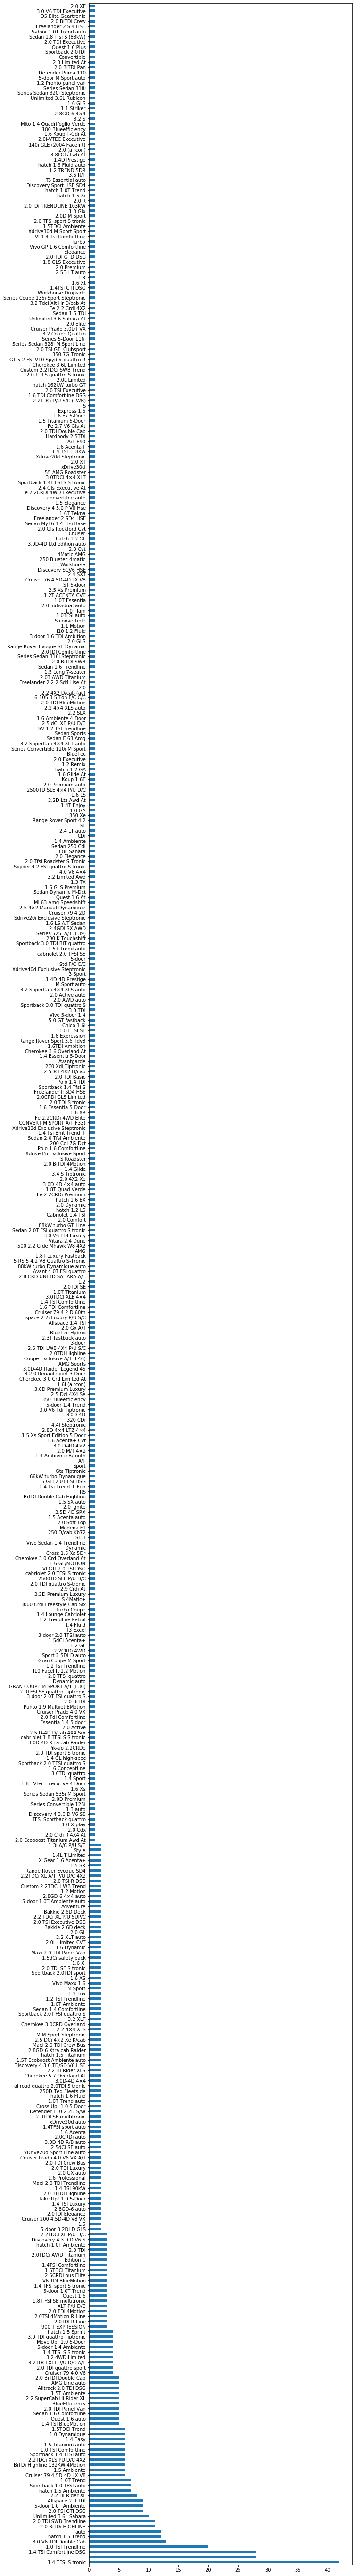

In [140]:
def proc(val):
    return " ".join(val.split()[3:])

car_df.loc[car_df.body == 'N/A', 'title'].apply(proc ).value_counts().plot(kind = 'barh' , figsize = (10,100 ))

In [141]:
import numpy
numpy.pi

3.141592653589793

In [144]:
X = '15553555254555555555555555555555555555555555555555555555555555555555555555555555555525333325555555555555555555555555555555555555235145555555555555555555555555555555555555555555555555555555555555555555555555554115555S55555555555555555555551455555555555555555555555555555255553555555555555555555555555555555555155555555555555555555555555555555555551555555555555555555555555555555555555555555555555555555555555555555555555555515555525525252525255555555555555555555555555555555555555555555555555555555555555555555555555552355555555555555555555555555555555555525545555555555555555555555555555555555535555555555555555555555555555555555555155555555525055555555555555555S5555512555255555555555555555555555555555555125555555555555555555555555555555552555555555555555435555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555435523555555555545555555555555555552555555155555555555555555555555555555555555555555555545555555555555355555555555555555555555555555555555555255555555555555555555555555555555555555215555555555555555555555555555255555555555555555555555555555555555533555155552555555555555555555555555555555555555555555555555555555555555555555555551211423235555555555555555555552334555555555555555555555555'
l = ['1','2','3','4','5']


''.join([char for char in X if char not in l])
    

'S0S'

In [146]:
def m(M,N):
    numd = 0
    n = M
    
    while n:
        numd +=1
        n
    index = numd
    while M:
        index -= 1
        if index ==0:
            return 
    
m(34,1)     

KeyboardInterrupt: 

In [148]:
((1/6)*(1/6)*(1/6))*100

0.4629629629629629

In [ ]:
50 = ab**(2016)
60 = ab**(2017)



In [152]:
from nltk.corpus import words

In [170]:
import enchant
cipher  = 'htslwfyzqfyntsx'

def decrypt(input_string,shift): 
    result = "" 
    for i in range(len(input_string)): 
        char = input_string[i] 
  
        result += chr((ord(char) - shift - 97) % 26 + 97) 
    return result 

def decypher(cipher):
    d = enchant.Dict("en_US")
    for shifts in range(1,26):
        word = decrypt(cipher,shifts)
        if d.check(word):
            print(word)

decypher(cipher)

congratulations


In [168]:


def check_sudoku(board):

    for i in range(9):
        rows = (numpy.unique(board[i, :]).shape == board[i, :].shape)
        cols = (numpy.unique(board[:, i]).shape == board[:, i].shape)
        
        if (not rows)  or (not cols):
            return 'invalid'

    block_size = 3
    for i in range(9):
        row_in_block, column_in_block = divmod(i, block_size)
        block = board[row_in_block*block_size:(row_in_block+1)*block_size, column_in_block*block_size:(column_in_block+1)*block_size]
        flattend_block = block.reshape(9)
        valid_block = (numpy.unique(flattend_block).shape == flattend_block.shape)
        if not valid_block:
            return 'invalid'

    return 'valid'
    
    

In [177]:
import math
10**(math.log(60)/2017)

1.0046849993288134

In [183]:
( (50*10)**9 )**(1/2016)

1.0281322289594805

In [1]:
b=(60/50)
a = 50/((b)**2016)
a*(b**2020)

103.67999999999999

In [2]:
36/4

9.0

In [ ]:
/html/body/div[2]/div[3]/div[1]/div[1]/div[2]/div/ul/li[10]/a